In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert categorical data to numerical data
# Convert Gender Strings to Numbers: Male to 0 and Female to 1
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

Index(['Gender', 'Age', 'Sleep Duration', 'Sleep Quality', 'Physical Activity',
       'Stress Level', 'BMI', 'Heart Rate', 'Daily Steps'],
      dtype='object')


In [8]:
# linear regression model

# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

# print(X)
# print(y)

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

# print(y_trainPred)

# Calculate MSE & R^2
mseTrain = mean_squared_error(y_train, y_trainPred)
r2Train = r2_score(y_train, y_trainPred)
mseTest = mean_squared_error(y_test, y_testPred)
r2Test = r2_score(y_test, y_testPred)

# Print results
print(f'\nTrain MSE: {mseTrain}')
print(f'Train R^2: {r2Train}\n')
print(f'Test MSE: {mseTest}')
print(f'Test R^2: {r2Test}')


Train MSE: 0.802675585284281
Train R^2: 0.7400357921735413

Test MSE: 0.72
Test R^2: 0.7827719373524995


Multinomial logistic regression training accuracy: 0.822742474916388
Multinomial logistic regression testing accuracy: 0.7866666666666666


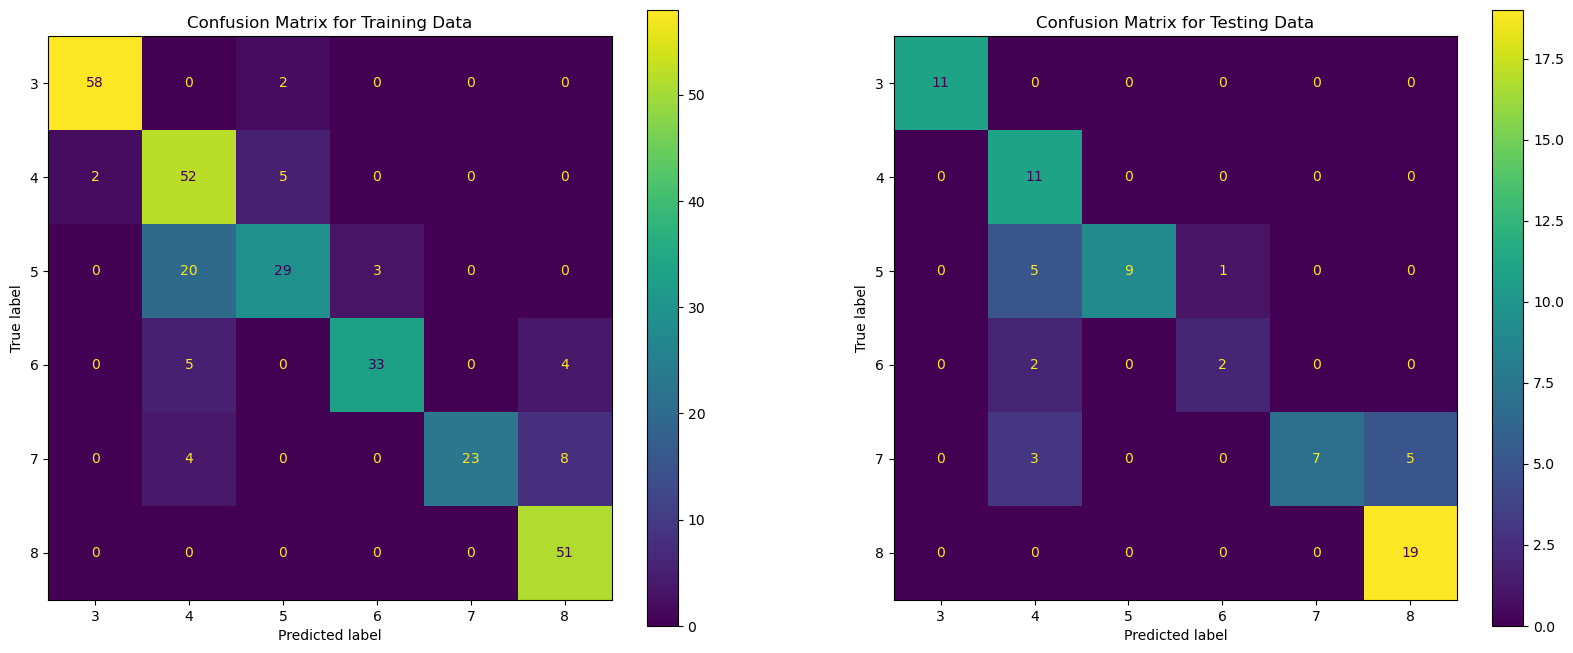

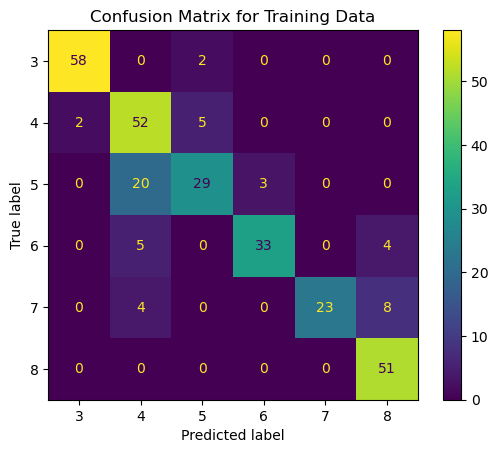

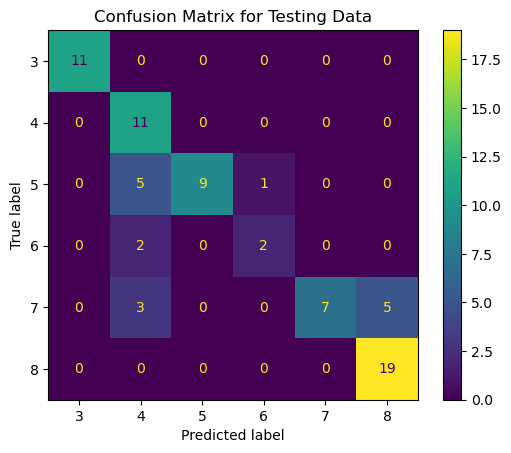

In [49]:
# logistic regression model
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression
multi_logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('Multinomial logistic regression training accuracy:',
      accuracy_score(y_train, y_trainPredmulti))

print('Multinomial logistic regression testing accuracy:',
      accuracy_score(y_test, y_testPredmulti))

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()